In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [2]:
df = pd.read_csv('SQL Injection.csv')

In [3]:
df.head(10)

,Dst Port,Protocol,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,8545,6,19,1,1,0,0.0,0,0,0.000000,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
1,445,6,408839,7,5,455,338.0,140,0,65.000000,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
2,443,6,4154047,91,145,8542,194296.0,469,0,93.868132,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
3,443,6,47261,9,7,557,3773.0,206,0,61.888889,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
4,443,6,10261988,9,11,777,6605.0,459,0,86.333333,...,20,311963.0,0.0,311963.0,311963.0,9950025.0,0.0,9950025.0,9950025.0,Benign
5,80,6,47197,3,4,437,860.0,437,0,145.666667,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
6,53,17,497,1,1,36,52.0,36,36,36.000000,...,8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
7,53,17,287,1,1,37,69.0,37,37,37.000000,...,8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
8,53,17,339,1,1,40,56.0,40,40,40.000000,...,8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
9,53,17,1209,1,1,44,72.0,44,44,44.000000,...,8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign


In [4]:
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0])

Series([], dtype: int64)


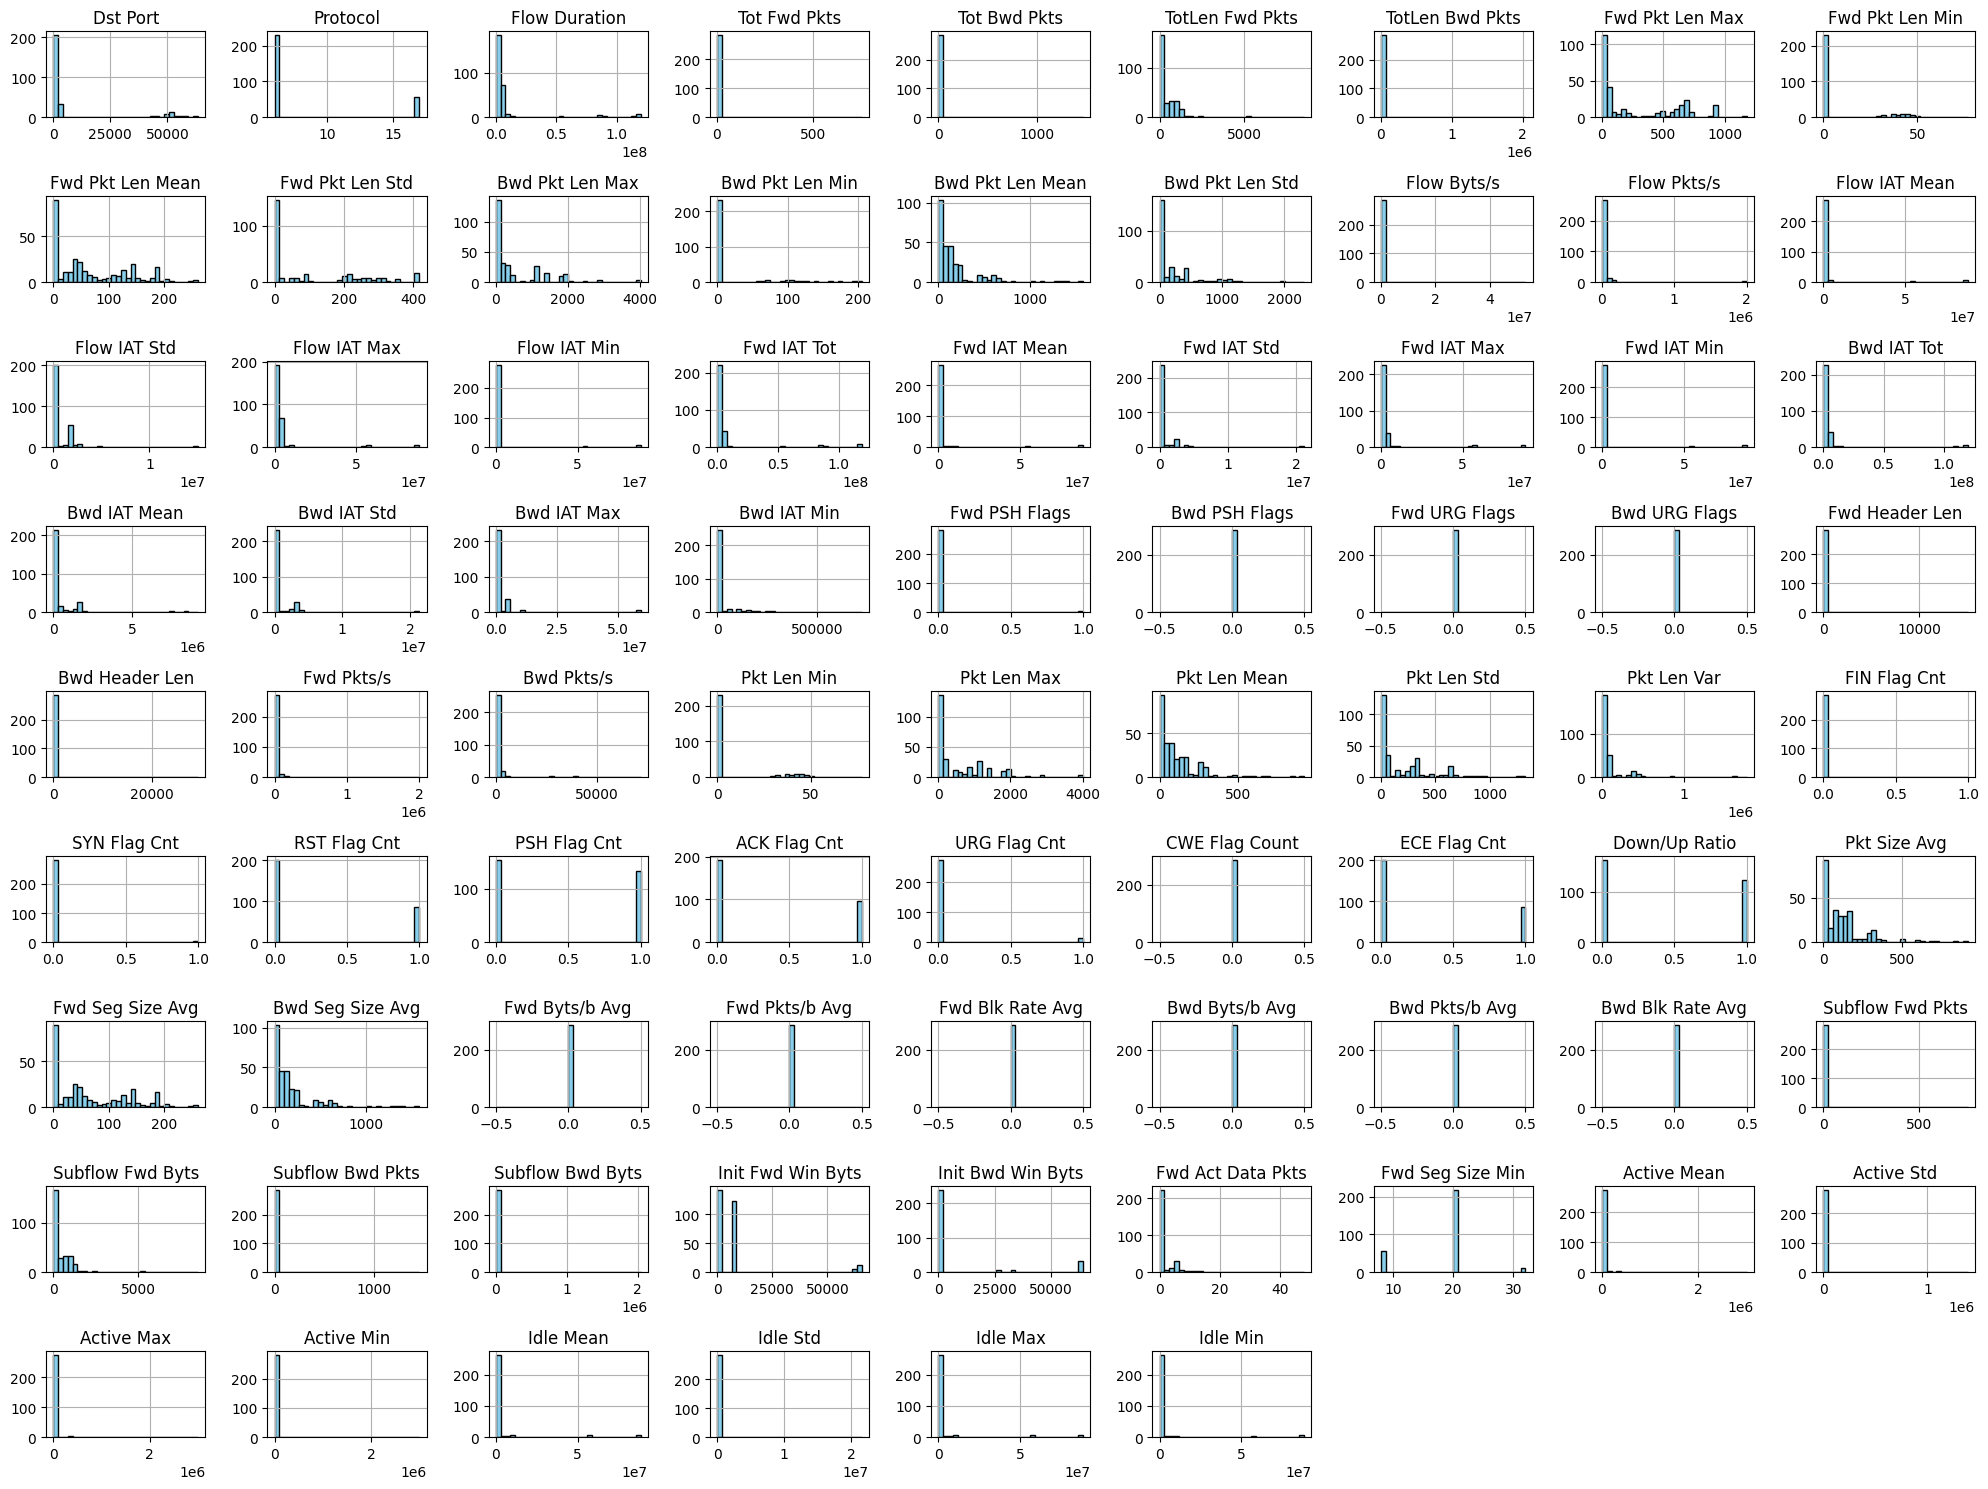

In [5]:
numeric_columns = df.select_dtypes(include=np.number).columns

# Histograms for all numeric columns
df[numeric_columns].hist(figsize=(20, 15), bins=30, color='skyblue', edgecolor='black')
plt.tight_layout()
plt.show()

Label
Benign           199
SQL Injection     87
Name: count, dtype: int64


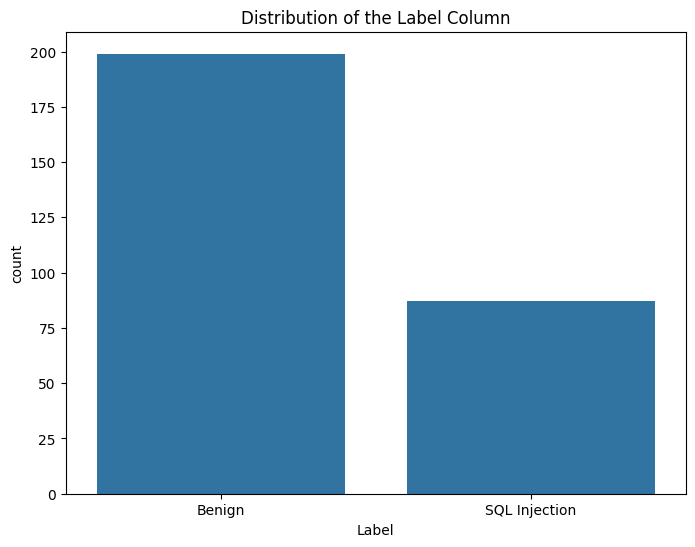

In [6]:
print(df['Label'].value_counts())

# Visualize the count of each class in the target variable
plt.figure(figsize=(8, 6))
sns.countplot(x='Label', data=df)
plt.title('Distribution of the Label Column')
plt.show()

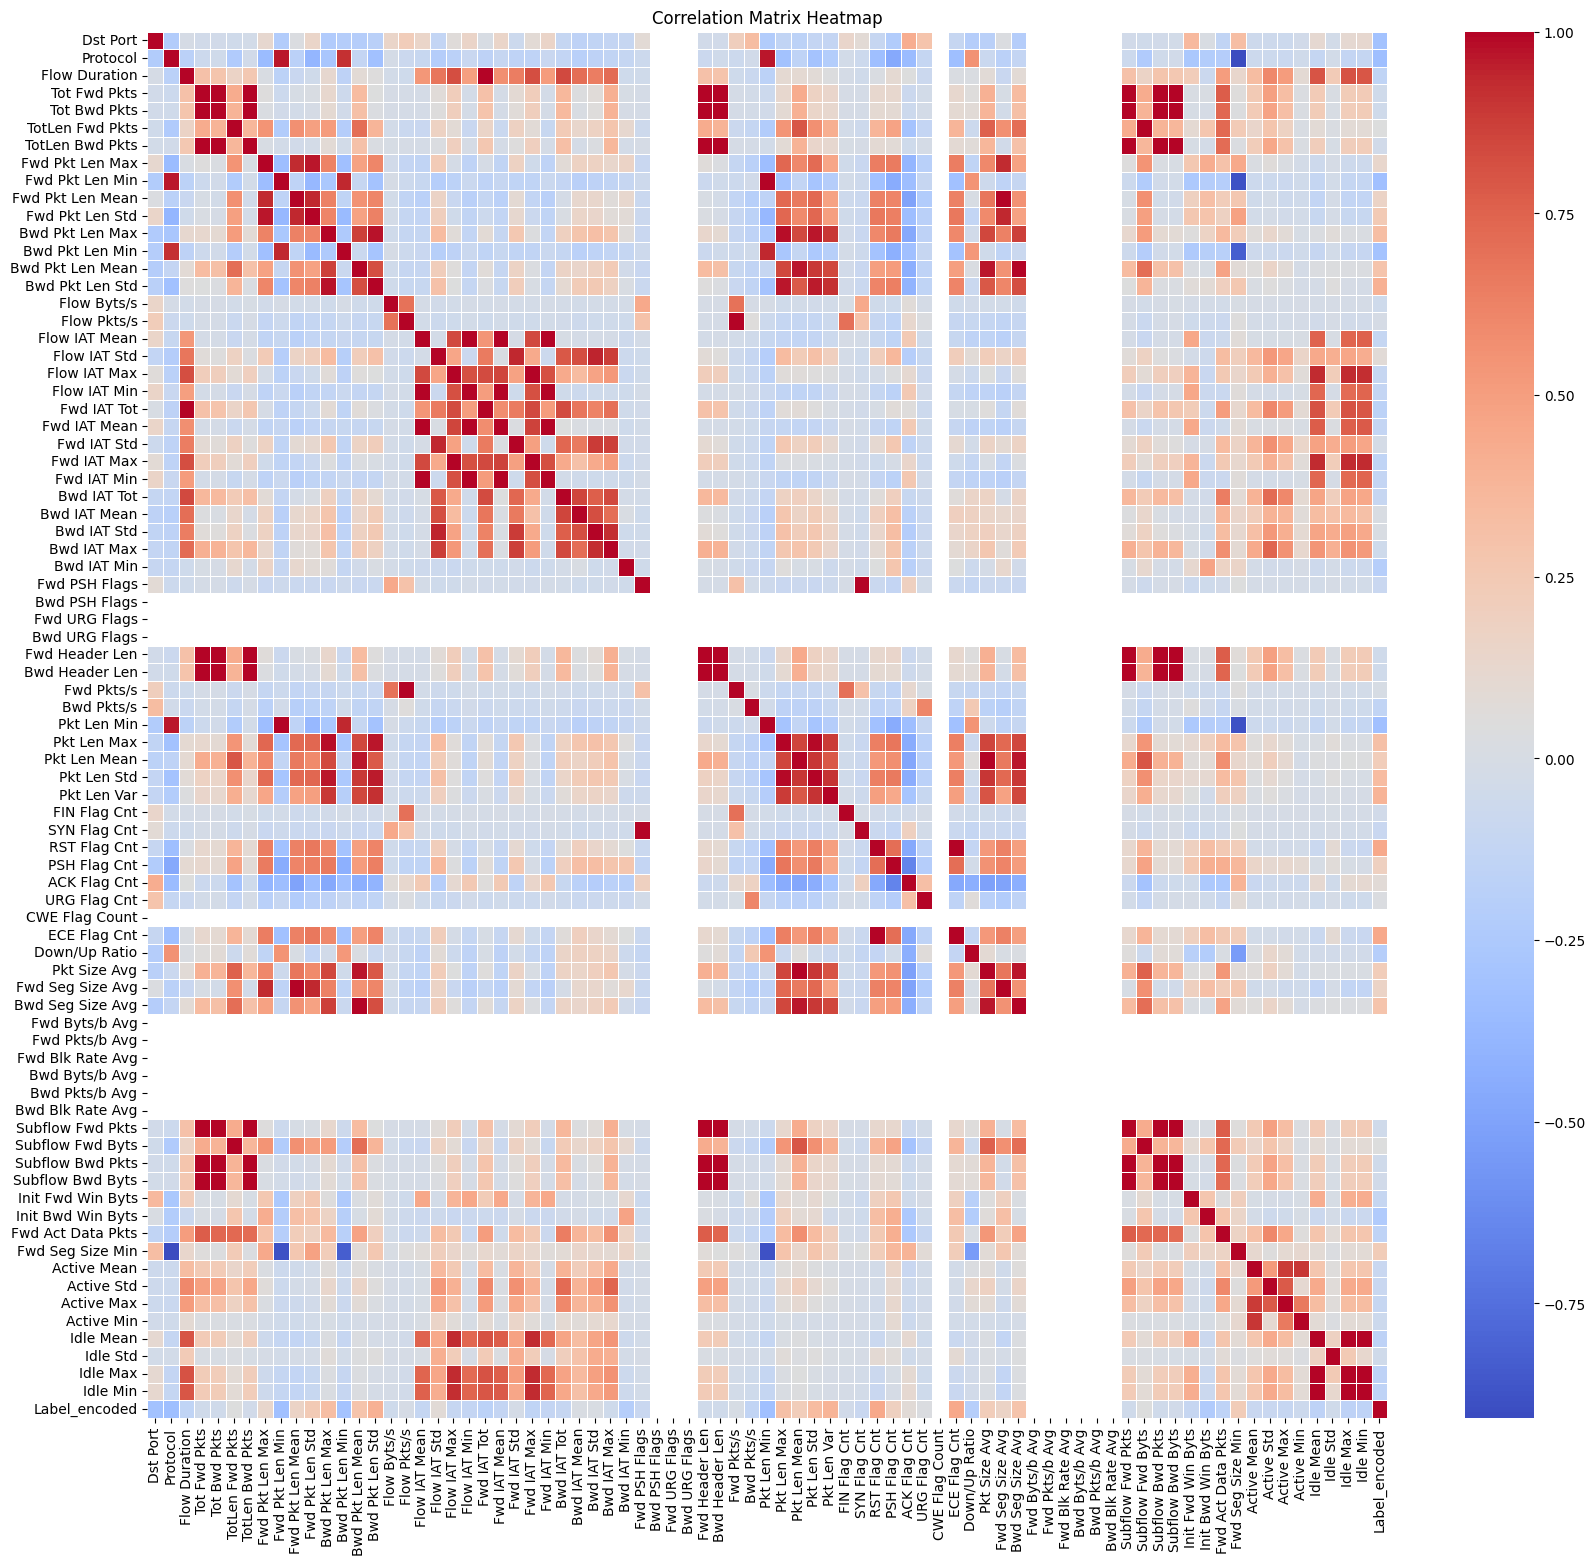

In [7]:
from sklearn.preprocessing import LabelEncoder
# Compute the correlation matrix
df1 = df.copy(deep=True)

# Encode the 'Label' column in df1
label_encoder = LabelEncoder()
df1['Label_encoded'] = label_encoder.fit_transform(df1['Label'])

# Drop non-numeric columns
df1_numeric = df1.select_dtypes(include=['number'])

# Compute the correlation matrix
correlation_matrix = df1_numeric.corr()

# Visualize the correlation matrix
plt.figure(figsize=(20, 18))
sns.heatmap(correlation_matrix, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

In [8]:
# Display the features most correlated with the encoded 'Label' column
correlation_with_label = correlation_matrix['Label_encoded'].sort_values(ascending=False)
print("Top 10 features most positively correlated with the Label:")
print(correlation_with_label.head(10))

Top 10 features most positively correlated with the Label:
Label_encoded       1.000000
RST Flag Cnt        0.444820
ECE Flag Cnt        0.444820
Bwd Pkt Len Std     0.400955
Pkt Len Var         0.385173
Pkt Len Std         0.340872
Bwd Pkt Len Max     0.326594
Pkt Len Max         0.307555
Bwd Pkt Len Mean    0.287625
Bwd Seg Size Avg    0.287625
Name: Label_encoded, dtype: float64


In [9]:
print("\nTop 10 features most negatively correlated with the Label:")
print(correlation_with_label.tail(10))


Top 10 features most negatively correlated with the Label:
Bwd PSH Flags      NaN
Fwd URG Flags      NaN
Bwd URG Flags      NaN
CWE Flag Count     NaN
Fwd Byts/b Avg     NaN
Fwd Pkts/b Avg     NaN
Fwd Blk Rate Avg   NaN
Bwd Byts/b Avg     NaN
Bwd Pkts/b Avg     NaN
Bwd Blk Rate Avg   NaN
Name: Label_encoded, dtype: float64


# feature extraction

In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Separate features and target variable
X = df.drop('Label', axis=1)
y = df['Label'] 

In [11]:
le = LabelEncoder()
y = le.fit_transform(y)

In [12]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features for LDA and autoencoder
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# random forest classifier

Top 25 important features:
Dst Port: 0.10356380135552269
Init Fwd Win Byts: 0.0905014062821158
Fwd IAT Min: 0.04808579103621071
Bwd Pkts/s: 0.0369513940258479
Bwd Pkt Len Max: 0.03597486420943196
Fwd Pkts/s: 0.03161262367303643
Flow IAT Min: 0.030827507398793683
Flow Byts/s: 0.03025563835587827
Flow Duration: 0.02982221772759637
Flow IAT Max: 0.029698201945606927
Flow IAT Mean: 0.027486648186811295
Bwd Pkt Len Std: 0.02687311341155142
Pkt Len Var: 0.025852986922798072
Fwd Pkt Len Std: 0.025771633890690017
Pkt Len Max: 0.025273690310209655
Flow Pkts/s: 0.023662856270898834
Fwd IAT Tot: 0.023069031320980624
Fwd IAT Max: 0.021465111601977442
Fwd IAT Mean: 0.020895470836449256
Pkt Len Std: 0.019983449974237687
Pkt Size Avg: 0.01843333955409533
Fwd Header Len: 0.017859376761326283
Subflow Fwd Pkts: 0.017726598583507128
Bwd Seg Size Avg: 0.013799695816568855
Fwd Pkt Len Max: 0.012633146862812979


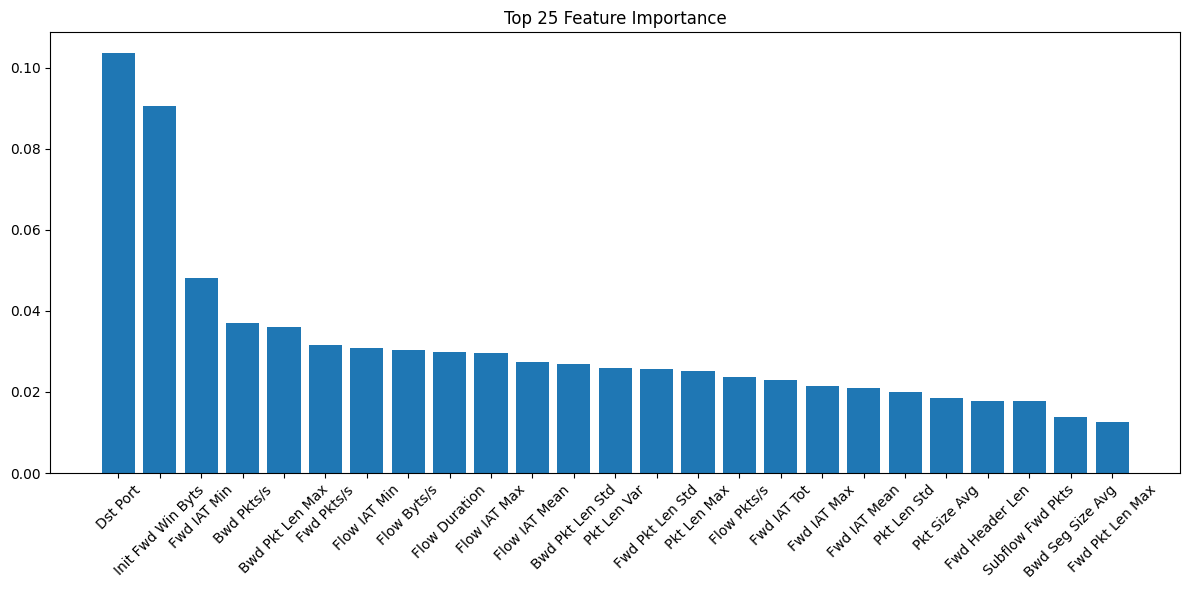

In [13]:
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import numpy as np

# Train a Random Forest classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
rf.fit(X_train, y_train)

# Get feature importances
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]

# Print the top 25 important features
print("Top 25 important features:")
for i in range(25):
    print(f"{X.columns[indices[i]]}: {importances[indices[i]]}")

# Plot feature importances for the top 25 features
plt.figure(figsize=(12, 6))
plt.title("Top 25 Feature Importance")
plt.bar(range(25), importances[indices[:25]], align='center')  # Adjusted to 25
plt.xticks(range(25), X.columns[indices[:25]], rotation=45)  # Adjusted to 25
plt.tight_layout()
plt.show()


In [14]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.callbacks import EarlyStopping
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Assuming X_train_scaled is already defined
input_dim = X_train_scaled.shape[1]
encoding_dim = 20  # Adjust this as needed

# Define the autoencoder architecture
input_layer = Input(shape=(input_dim,))
encoder = Dense(encoding_dim, activation='relu')(input_layer)
decoder = Dense(input_dim, activation='sigmoid')(encoder)

autoencoder = Model(inputs=input_layer, outputs=decoder)
autoencoder.compile(optimizer='adam', loss='mse')

# Set up early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the autoencoder with fewer epochs and early stopping
autoencoder.fit(X_train_scaled, X_train_scaled, 
                epochs=50,              # You can reduce this further for testing
                batch_size=128,         # Adjusted batch size for potentially faster training
                validation_split=0.2, 
                callbacks=[early_stopping],  # Use early stopping
                verbose=1)

# Extract the encoder part
encoder_model = Model(inputs=input_layer, outputs=encoder)

# Get the weights of the encoder layer
encoder_weights = autoencoder.get_weights()[0]
# Access weights directly from the encoder layer

# Create a DataFrame for feature importance based on weights
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Weight': np.abs(encoder_weights).sum(axis=1)  # Sum of absolute weights for each feature
})

# Sort features by absolute weight
feature_importance = feature_importance.sort_values(by='Weight', ascending=False)

# Select top 25 features
top_features = feature_importance.head(25)

# Print top 25 features
print("Top 25 features by encoder weights:")
print(top_features[['Feature', 'Weight']])

# Plot the top features
plt.figure(figsize=(12, 6))
plt.bar(top_features['Feature'], top_features['Weight'], color='skyblue')
plt.title("Top 25 Features by Encoder Weights")
plt.xlabel("Absolute Weight Value")
plt.ylabel("Features")
plt.xticks(rotation=45, ha='right')   # Invert y-axis to have the highest on top
plt.tight_layout()
plt.show()

# Transform the features
X_train_encoded = encoder_model.predict(X_train_scaled)
X_test_encoded = encoder_model.predict(X_test_scaled)

print(f"Encoded features shape: {X_train_encoded.shape}")


ModuleNotFoundError: No module named 'tensorflow'

In [17]:
random forest 
SQL Injection.csv	Dst Port	0.103563801
SQL Injection.csv	Init Fwd Win Byts	0.090501406
SQL Injection.csv	Fwd IAT Min	0.048085791
SQL Injection.csv	Bwd Pkts/s	0.036951394
SQL Injection.csv	Bwd Pkt Len Max	0.035974864
SQL Injection.csv	Fwd Pkts/s	0.031612624
SQL Injection.csv	Flow IAT Min	0.030827507
SQL Injection.csv	Flow Byts/s	0.030255638
SQL Injection.csv	Flow Duration	0.029822218
SQL Injection.csv	Flow IAT Max	0.029698202
SQL Injection.csv	Flow IAT Mean	0.027486648
SQL Injection.csv	Bwd Pkt Len Std	0.026873113
SQL Injection.csv	Pkt Len Var	0.025852987
SQL Injection.csv	Fwd Pkt Len Std	0.025771634
SQL Injection.csv	Pkt Len Max	0.02527369
SQL Injection.csv	Flow Pkts/s	0.023662856
SQL Injection.csv	Fwd IAT Tot	0.023069031
SQL Injection.csv	Fwd IAT Max	0.021465112
SQL Injection.csv	Fwd IAT Mean	0.020895471
SQL Injection.csv	Pkt Len Std	0.01998345
SQL Injection.csv	Pkt Size Avg	0.01843334
SQL Injection.csv	Fwd Header Len	0.017859377
SQL Injection.csv	Subflow Fwd Pkts	0.017726599
SQL Injection.csv	Bwd Seg Size Avg	0.013799696
SQL Injection.csv	Fwd Pkt Len Max	0.012633147
AUTOENCODER :
SQL Injection.csv	Fwd Header Len	3.865290165
SQL Injection.csv	Flow Byts/s	3.516261578
SQL Injection.csv	Fwd IAT Std	3.511256456
SQL Injection.csv	Bwd Pkts/s	3.504237413
SQL Injection.csv	Idle Std	3.408019543
SQL Injection.csv	Fwd Pkt Len Max	3.362522364
SQL Injection.csv	Flow IAT Std	3.354860783
SQL Injection.csv	Fwd Pkt Len Mean	3.333404541
SQL Injection.csv	Pkt Len Min	3.324093103
SQL Injection.csv	Init Fwd Win Byts	3.300082922
SQL Injection.csv	Tot Fwd Pkts	3.26408124
SQL Injection.csv	Fwd IAT Min	3.254895687
SQL Injection.csv	Fwd IAT Mean	3.203063726
SQL Injection.csv	Bwd IAT Tot	3.154038429
SQL Injection.csv	Pkt Len Max	3.138279915
SQL Injection.csv	RST Flag Cnt	3.095275879
SQL Injection.csv	Fwd Seg Size Min	3.095089436
SQL Injection.csv	Active Mean	3.073188782
SQL Injection.csv	Bwd IAT Std	3.060922146
LDA :
SQL Injection.csv	Pkt Len Min	4719.859025
SQL Injection.csv	Fwd Pkt Len Min	-4705.304452
SQL Injection.csv	Flow IAT Min	1537.886352
SQL Injection.csv	Idle Mean	1312.020372
SQL Injection.csv	Idle Max	-962.0131203
SQL Injection.csv	Flow IAT Mean	-923.5884456
SQL Injection.csv	Flow IAT Max	-719.3273762
SQL Injection.csv	Fwd IAT Mean	-644.0955529
SQL Injection.csv	Fwd IAT Min	502.3202478
SQL Injection.csv	Flow Duration	410.9248714
SQL Injection.csv	Idle Min	-356.575619
SQL Injection.csv	Fwd IAT Tot	-351.1845954
SQL Injection.csv	Bwd IAT Max	297.7887288
SQL Injection.csv	Active Min	-268.6719845
SQL Injection.csv	Active Mean	244.9488984
SQL Injection.csv	Flow IAT Std	215.1358715
SQL Injection.csv	Bwd IAT Std	-213.3002452
SQL Injection.csv	Active Std	-171.7368001
SQL Injection.csv	Fwd IAT Max	129.1477284
SQL Injection.csv	Fwd Header Len	122.6646578
SQL Injection.csv	Active Max	98.89705361
SQL Injection.csv	Fwd IAT Std	97.83478329
SQL Injection.csv	Pkt Len Std	94.16142814
SQL Injection.csv	Tot Bwd Pkts	84.01796389
SQL Injection.csv	Subflow Bwd Pkts	84.01796389


SyntaxError: invalid syntax (4148737710.py, line 1)

In [19]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Assuming the dataset is loaded
data = pd.read_csv('SQL Injection.csv')

# Provided Top Features and Importances
lda_features = pd.DataFrame({
    'Feature': ['Fwd Header Len', 'Flow Byts/s', 'Fwd IAT Std', 'Bwd Pkts/s', 'Idle Std', 
                'Fwd Pkt Len Max', 'Flow IAT Std', 'Fwd Pkt Len Mean', 'Pkt Len Min', 'Init Fwd Win Byts'],
    'Importance': [3.865, 3.516, 3.511, 3.504, 3.408, 3.363, 3.355, 3.333, 3.324, 3.300]
})

rf_features = pd.DataFrame({
    'Feature': ['Dst Port', 'Init Fwd Win Byts', 'Fwd IAT Min', 'Bwd Pkts/s', 'Bwd Pkt Len Max',
                'Fwd Pkts/s', 'Flow IAT Min', 'Flow Byts/s', 'Flow Duration', 'Flow IAT Max'],
    'Importance': [0.104, 0.091, 0.048, 0.037, 0.036, 0.032, 0.031, 0.030, 0.030, 0.030]
})

ae_features = pd.DataFrame({
    'Feature': ['Pkt Len Min', 'Fwd Header Len', 'Fwd IAT Std', 'Flow Byts/s', 'Bwd Pkts/s',
                'Idle Std', 'Fwd Pkt Len Max', 'Pkt Len Max', 'Fwd IAT Mean', 'Fwd IAT Min'],
    'Importance': [4719.86, 3.865, 3.511, 3.516, 3.504, 3.408, 3.362, 3.138, 3.203, 3.255]
})

# Combine all features and their importance
all_features = pd.concat([lda_features, rf_features, ae_features], keys=['LDA', 'RF', 'AE'])

# Calculate average importance
all_features['Importance'] = pd.to_numeric(all_features['Importance'], errors='coerce')
feature_importance_avg = all_features.groupby('Feature')['Importance'].mean().reset_index()

# Select Top Features
top_features = feature_importance_avg.sort_values(by='Importance', ascending=False).head(20)
selected_features = top_features['Feature'].values

# Prepare the dataset
X = data[selected_features]
y = data['Label']  # Assuming 'Label' is the target

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train the Random Forest Classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_test)

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nAccuracy Score:", accuracy_score(y_test, y_pred))


Confusion Matrix:
 [[60  0]
 [ 1 25]]

Classification Report:
                precision    recall  f1-score   support

       Benign       0.98      1.00      0.99        60
SQL Injection       1.00      0.96      0.98        26

     accuracy                           0.99        86
    macro avg       0.99      0.98      0.99        86
 weighted avg       0.99      0.99      0.99        86


Accuracy Score: 0.9883720930232558


In [20]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score

# Assume 'df' contains your dataset with SQL injection features and 'Label' as the target column
# Split the data into features (X) and target (y)
X = df.drop('Label', axis=1)  # 'Label' indicates SQL Injection or not (1 for threat, 0 for no threat)
y = df['Label']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the RandomForest model
model = RandomForestClassifier(random_state=42, n_estimators=100)
model.fit(X_train, y_train)

# Predict on the test set and print performance metrics
y_pred = model.predict(X_test)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

# Function to make predictions on new logs
def detect_sql_injection(log):
    log_df = pd.DataFrame([log], columns=X.columns)  # Convert log into a DataFrame
    prediction = model.predict(log_df)[0]
    if prediction == 1:
        print("The log indicates a SQL Injection threat.")
    else:
        print("The log does not indicate a SQL Injection threat.")

# Example usage with a new log (replace with actual log data as a dictionary)
new_log = {
    'Fwd Header Len': 25,
    'Fwd IAT Min': 20,
    'FIN Flag Cnt': 0,
    'Fwd Seg Size Min': 6,
    'ACK Flag Cnt': 1,
    'Bwd Pkt Len Min': 15,
    'Dst Port': 3306,  # Example for SQL database port
    'Init Fwd Win Byts': 256,
    'Fwd Seg Size Avg': 10,
    'Fwd Pkt Len Mean': 105,
    'Bwd Pkts/s': 0.15,
    'Subflow Fwd Pkts': 12,
    'Tot Fwd Pkts': 20,
    'Bwd Header Len': 3
}

# Run the prediction function
detect_sql_injection(new_log)


Confusion Matrix:
 [[39  0]
 [ 1 18]]
Accuracy: 0.9827586206896551
The log does not indicate a SQL Injection threat.
